In [ ]:
#Linear Regression

In [1]:
#Import dependancies
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Read in csv file that has gone through the ETL process
ml_movies=pd.read_csv("Resource/IMDB_cora.csv")
ml_movies

,Unnamed: 0,country,language,world_gross_income
0,79,Russia,Russian,144968.0
1,165,Germany,German,8811.0
2,222,USA,English,772155.0
3,245,USA,English,9183673.0
4,251,USA,English,26916.0
...,...,...,...,...
30851,85847,India,Malayalam,4791.0
30852,85850,"France, Belgium",French,3507171.0
30853,85851,Netherlands,"German, Dutch",7299062.0
30854,85853,Turkey,Turkish,2833.0


In [3]:
#Remove the extra column "Unnamed: 0"
ml_movies= ml_movies.drop("Unnamed: 0", axis=1)
ml_movies

,country,language,world_gross_income
0,Russia,Russian,144968.0
1,Germany,German,8811.0
2,USA,English,772155.0
3,USA,English,9183673.0
4,USA,English,26916.0
...,...,...,...
30851,India,Malayalam,4791.0
30852,"France, Belgium",French,3507171.0
30853,Netherlands,"German, Dutch",7299062.0
30854,Turkey,Turkish,2833.0


In [4]:
#List out all unique languages in the data. Goal is to separate English from non-English movies to see if English language movies gross a higher income than non-English movies
ml_movies["language"].unique()

array(['Russian', 'German', 'English', ...,
       'Thai, English, Mandarin, Cantonese', 'English, Finnish, Mandarin',
       'German, Dutch'], dtype=object)

In [5]:
#Create function to replace labels
English = ["English","english","English,None"]
def clean(response):
    if response.lower().rstrip() in English:
        return "English"
    else:
        return "NonEnglish"
ml_movies["language"] = ml_movies["language"].apply(lambda x: clean(x))
print(ml_movies)

               country    language  world_gross_income
0               Russia  NonEnglish            144968.0
1              Germany  NonEnglish              8811.0
2                  USA     English            772155.0
3                  USA     English           9183673.0
4                  USA     English             26916.0
...                ...         ...                 ...
30851            India  NonEnglish              4791.0
30852  France, Belgium  NonEnglish           3507171.0
30853      Netherlands  NonEnglish           7299062.0
30854           Turkey  NonEnglish              2833.0
30855            Spain  NonEnglish             59794.0

[30856 rows x 3 columns]


In [6]:
#Set up definition for X and y and reshape the data
X=ml_movies[["language"]]
y=ml_movies["world_gross_income"].values.reshape(-1,1)
print(X,y)

         language
0      NonEnglish
1      NonEnglish
2         English
3         English
4         English
...           ...
30851  NonEnglish
30852  NonEnglish
30853  NonEnglish
30854  NonEnglish
30855  NonEnglish

[30856 rows x 1 columns] [[1.449680e+05]
 [8.811000e+03]
 [7.721550e+05]
 ...
 [7.299062e+06]
 [2.833000e+03]
 [5.979400e+04]]


In [7]:
# Apply label encoding to categorize the language as being English or non-English
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data = X.copy()
label_encoder.fit(data["language"])
label_encoder.classes_

array(['English', 'NonEnglish'], dtype=object)

In [8]:
#Transform the data using label encoding
label_encoder.transform(data.language)

array([1, 1, 0, ..., 1, 1, 1])

In [9]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,language_English,language_NonEnglish
23546,0,1
19047,0,1
23672,1,0
5816,1,0
30201,0,1


In [10]:
#Create a StandardScaler model
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [11]:
#Transform training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

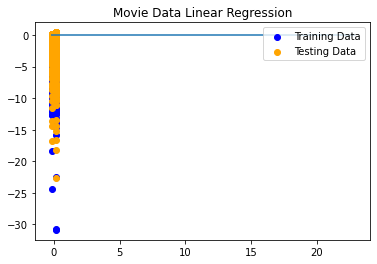

In [12]:
#Create Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Movie Data Linear Regression")
plt.show()

In [13]:
#Calculate MSE and R2
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0693749706031366, R2: 0.020180562672921343


In [ ]:
#Conclusion: The high value of MSE and the low value of R2 demonstrate that the data does not fit this regression model very well. Another model should be attempted. 

In [ ]:
#Logistic Regression